In [1]:
%matplotlib inline
from shapely import wkt
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pysal.lib import examples
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from scipy.special import factorial
#sns.set(style="whitegrid")

C:\Users\jianq\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\jianq\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
df_final=pd.read_csv("Final_merged_city_portland.csv") #ask for update csv
df_final=df_final.reset_index()
df_final=df_final.drop(columns=['index'])

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)

In [3]:
df_final.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,EmploymentS,EstablishmentS,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,(POLYGON ((-122.3868792758254 45.5190298016209...,2601,5717,3699,294,356,...,0.0,0.0,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,(POLYGON ((-122.3868792758254 45.5190298016209...,2826,6037,4024,368,476,...,0.0,0.0,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,(POLYGON ((-122.3868792758254 45.5190298016209...,2868,6153,4090,369,507,...,0.0,0.0,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,(POLYGON ((-122.3868792758254 45.5190298016209...,2876,6022,3931,296,404,...,0.0,0.0,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,(POLYGON ((-122.3868792758254 45.5190298016209...,3078,6181,4094,316,457,...,0.0,0.0,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392


In [4]:
df_final.shape

(2608, 23)

In [5]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'EmploymentS', 'EstablishmentS', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio'],
      dtype='object')

In [6]:
df_final3=df_final.groupby(['year'], as_index=False).agg(
    { 'EmploymentS':'mean', 'EstablishmentS':'mean'})

In [7]:
df_final3.head()

,year,EmploymentS,EstablishmentS
0,2010,1557.070061,74.739936
1,2011,1598.731753,75.180485
2,2012,1264.806553,61.859742
3,2013,1284.351071,62.531839
4,2014,1316.261484,63.682289


In [8]:
df_final.iloc[:50,:]

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,EmploymentS,EstablishmentS,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,(POLYGON ((-122.3868792758254 45.5190298016209...,2601,5717,3699,294,356,...,0.000000,0.000000,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,(POLYGON ((-122.3868792758254 45.5190298016209...,2826,6037,4024,368,476,...,0.000000,0.000000,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,(POLYGON ((-122.3868792758254 45.5190298016209...,2868,6153,4090,369,507,...,0.000000,0.000000,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,(POLYGON ((-122.3868792758254 45.5190298016209...,2876,6022,3931,296,404,...,0.000000,0.000000,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,(POLYGON ((-122.3868792758254 45.5190298016209...,3078,6181,4094,316,457,...,0.000000,0.000000,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392
5,2447,41051010402,POINT (-122.3356858461854 45.48565778402043),2015,(POLYGON ((-122.3868792758254 45.5190298016209...,3063,6349,4184,346,517,...,0.000000,0.000000,0.382107,0.118916,0.596026,0.029383,0.049298,0.841659,0.016650,0.026118
6,2450,41051010402,POINT (-122.3356596646475 45.48564052912985),2016,(POLYGON ((-122.3868792758254 45.5190298016209...,3190,6566,4383,334,540,...,0.000000,0.000000,0.362473,0.128389,0.813187,0.023197,0.028527,0.878056,0.000000,0.033856
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,(POLYGON ((-122.3868792758254 45.5190298016209...,3456,6981,4633,399,485,...,0.000000,0.000000,0.355966,0.133792,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880
8,2536,41051010500,POINT (-122.08527042624 45.52768157713402),2010,(POLYGON ((-122.3970989671113 45.5726005840231...,1765,3944,2580,258,313,...,255.555556,17.888889,0.259381,0.107759,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161
9,2539,41051010500,POINT (-122.08527042624 45.52768157713402),2011,(POLYGON ((-122.3970989671113 45.5726005840231...,1796,4138,2803,247,284,...,249.166667,17.250000,0.301112,0.106573,1.000000,0.004454,0.004454,0.827951,0.005011,0.027283


In [9]:
df_final1=df_final.groupby(['geo_id'], as_index=False).agg(
    { 'EmploymentS':'mean', 'EstablishmentS':'mean','geometry':'first'})  

In [10]:
df_final1.head()

,geo_id,EmploymentS,EstablishmentS,geometry
0,41051000100,4093.842436,233.650918,(POLYGON ((-122.6685096758439 45.4896287092521...
1,41051000200,853.065138,48.326562,(POLYGON ((-122.6511506479096 45.4903237698433...
2,41051000301,1552.518125,88.608023,(POLYGON ((-122.6435166338574 45.4903107958509...
3,41051000302,145.966677,8.613696,(POLYGON ((-122.6376585383979 45.4743597792970...
4,41051000401,543.987224,37.206859,(POLYGON ((-122.6205705527944 45.4827708556041...


In [11]:
df_final2=df_final.groupby(['geo_id'], as_index=False).agg(
    { 'EmploymentS':'mean', 'EstablishmentS':'mean','geometry':'first','total_tran':'mean',
     
       'pop':'mean', 'edut':'mean', 'collegemale':'mean', 'collegefemale':'mean', 'households':'mean',
     'income':'mean', 'ratio_65':'mean',
       'ratio_22_50':'mean', 'bus_ratio':'mean',
       'bus_ratio_total':'mean', 'public_ratio':'mean', 'car_ratio':'mean',
     'bicy_ratio':'mean',
       'walked_ratio':'mean'})

In [12]:
df_final2.head()

,geo_id,EmploymentS,EstablishmentS,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,41051000100,4093.842436,233.650918,(POLYGON ((-122.6685096758439 45.4896287092521...,3243.250,6095.875,4667.250,615.000,733.125,170.125,2826.250,0.464817,0.121203,0.953060,0.084304,0.087963,0.677976,0.095493,0.041783
1,41051000200,853.065138,48.326562,(POLYGON ((-122.6511506479096 45.4903237698433...,3135.125,6157.500,4660.500,653.750,825.875,173.250,2954.750,0.488260,0.134470,0.957985,0.107039,0.111167,0.671435,0.091021,0.025325
2,41051000301,1552.518125,88.608023,(POLYGON ((-122.6435166338574 45.4903107958509...,2580.875,5330.125,3346.750,423.375,387.625,130.500,2109.375,0.449649,0.131125,0.964928,0.139973,0.144679,0.497451,0.050301,0.186356
3,41051000302,145.966677,8.613696,(POLYGON ((-122.6376585383979 45.4743597792970...,3633.000,6929.875,4937.750,824.375,858.625,175.500,2621.875,0.385256,0.137374,0.972658,0.055748,0.057137,0.758092,0.074766,0.036437
4,41051000401,543.987224,37.206859,(POLYGON ((-122.6205705527944 45.4827708556041...,1994.375,3549.625,2708.625,410.500,492.500,141.500,1502.125,0.518228,0.103065,0.991553,0.113903,0.115135,0.727155,0.049731,0.015462


In [13]:
gdf =gpd.GeoDataFrame(df_final1, geometry='geometry', crs={'init': 'epsg:4326'})
gdf.head()

,geo_id,EmploymentS,EstablishmentS,geometry
0,41051000100,4093.842436,233.650918,"MULTIPOLYGON (((-122.66851 45.48963, -122.6654..."
1,41051000200,853.065138,48.326562,"MULTIPOLYGON (((-122.65115 45.49032, -122.6493..."
2,41051000301,1552.518125,88.608023,"MULTIPOLYGON (((-122.64352 45.49031, -122.6395..."
3,41051000302,145.966677,8.613696,"MULTIPOLYGON (((-122.63766 45.47436, -122.6344..."
4,41051000401,543.987224,37.206859,"MULTIPOLYGON (((-122.62057 45.48277, -122.6205..."


In [14]:
gdf2 =gpd.GeoDataFrame(df_final2, geometry='geometry', crs={'init': 'epsg:4326'})
gdf2.head()

,geo_id,EmploymentS,EstablishmentS,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,41051000100,4093.842436,233.650918,"MULTIPOLYGON (((-122.66851 45.48963, -122.6654...",3243.250,6095.875,4667.250,615.000,733.125,170.125,2826.250,0.464817,0.121203,0.953060,0.084304,0.087963,0.677976,0.095493,0.041783
1,41051000200,853.065138,48.326562,"MULTIPOLYGON (((-122.65115 45.49032, -122.6493...",3135.125,6157.500,4660.500,653.750,825.875,173.250,2954.750,0.488260,0.134470,0.957985,0.107039,0.111167,0.671435,0.091021,0.025325
2,41051000301,1552.518125,88.608023,"MULTIPOLYGON (((-122.64352 45.49031, -122.6395...",2580.875,5330.125,3346.750,423.375,387.625,130.500,2109.375,0.449649,0.131125,0.964928,0.139973,0.144679,0.497451,0.050301,0.186356
3,41051000302,145.966677,8.613696,"MULTIPOLYGON (((-122.63766 45.47436, -122.6344...",3633.000,6929.875,4937.750,824.375,858.625,175.500,2621.875,0.385256,0.137374,0.972658,0.055748,0.057137,0.758092,0.074766,0.036437
4,41051000401,543.987224,37.206859,"MULTIPOLYGON (((-122.62057 45.48277, -122.6205...",1994.375,3549.625,2708.625,410.500,492.500,141.500,1502.125,0.518228,0.103065,0.991553,0.113903,0.115135,0.727155,0.049731,0.015462


In [15]:
gdf2.shape

(171, 19)

In [16]:
qW = ps.lib.weights.Queen.from_dataframe(gdf)

In [17]:
qW2 = ps.lib.weights.Queen.from_dataframe(gdf2)

In [18]:
qW.transform = 'r'

In [19]:
qW2.transform = 'r'

In [20]:
import libpysal as lps
y = gdf['EstablishmentS']
ylag = lps.weights.lag_spatial(qW, y)

In [21]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

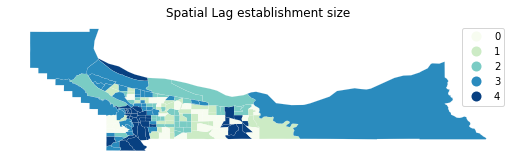

In [22]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag establishment size")

plt.show()

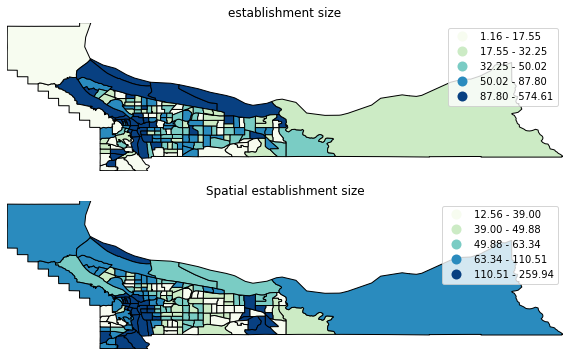

In [23]:
gdf['lag_est'] = ylag
f,ax = plt.subplots(2,1,figsize=(4*8,6))
gdf.plot(column='EstablishmentS', ax=ax[0], edgecolor='k',
        scheme="quantiles", legend=True, k=5, cmap='GnBu')
ax[0].axis(gdf.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("establishment size")

gdf.plot(column='lag_est', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', legend=True, k=5)
ax[1].axis(gdf.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial establishment size")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [24]:
y.median()

40.91676617512499

In [25]:
yb = y > y.median()
sum(yb)

85

In [26]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
gdf['yb'] = yb

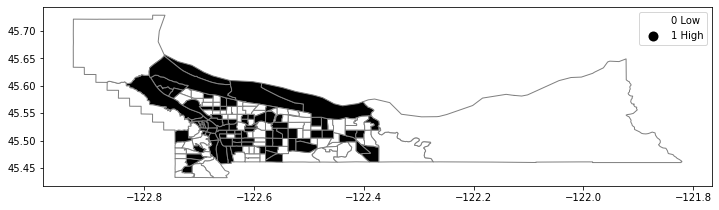

In [27]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [30]:
import esda
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(gdf)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [31]:
jc.bb

162

In [32]:
jc.ww

132

In [33]:
jc.bw

235

In [34]:
jc.bb + jc.ww + jc.bw

529

In [35]:
wq.s0 / 2

529.0

In [36]:
jc.mean_bb

129

Text(0.5, 0, 'BB Counts')

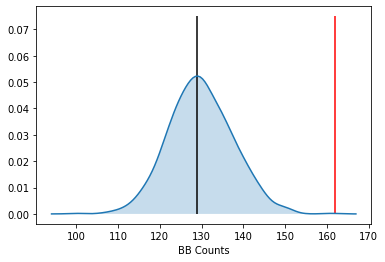

In [37]:
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [38]:
jc.p_sim_bb

0.001

In [39]:
wq.transform = 'r'

In [40]:
y = gdf['EstablishmentS']

In [41]:
#Moran's I (Global)
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I
#positive related

0.26449658439944207

In [42]:
#Again, our value for the statistic needs to be interpreted against a reference distribution under the null of CSR. 
#PySAL uses a similar approach as we saw in the join count analysis: random spatial permutations.

Text(0.5, 0, "Moran's I")

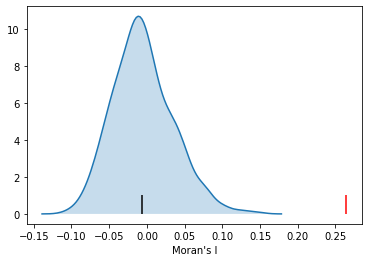

In [43]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [44]:
mi.p_sim

0.001

In [45]:
lag_price = lps.weights.lag_spatial(wq, gdf['EstablishmentS'])

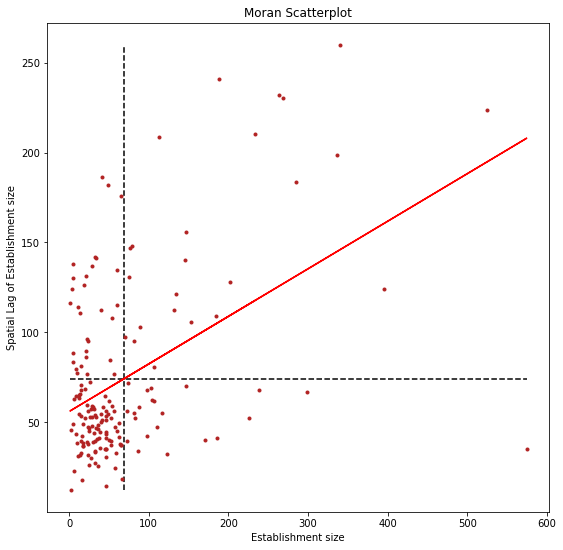

In [46]:
price = gdf['EstablishmentS']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Establishment size')
plt.xlabel('Establishment size')
plt.show()

In [47]:
# Moran's I (Local)
li = esda.moran.Moran_Local(y, wq)

In [48]:
(li.p_sim < 0.05).sum()

25

In [49]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [50]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

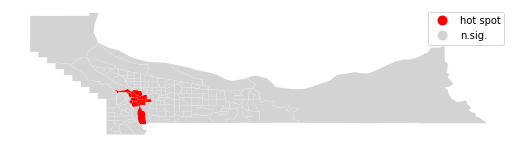

In [51]:
df = gdf
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [52]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

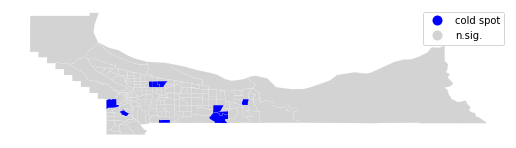

In [53]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [54]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

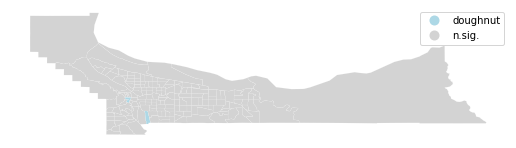

In [55]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [56]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

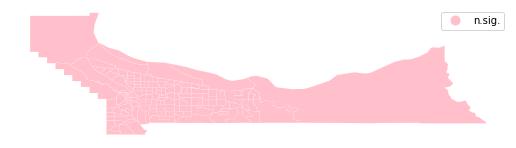

In [57]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [58]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0])

In [59]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

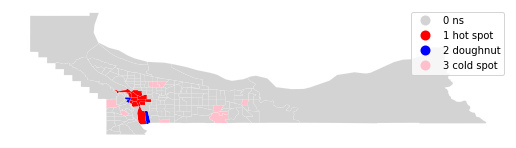

In [60]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [61]:
gdf2.columns

Index(['geo_id', 'EmploymentS', 'EstablishmentS', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'ratio_65', 'ratio_22_50', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio'],
      dtype='object')

In [62]:
YVar='EstablishmentS'
XVars=['total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
    'ratio_65', 'ratio_22_50', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio']
gdf2[[YVar]+XVars].corr()  

,EstablishmentS,total_tran,pop,edut,collegemale,collegefemale,households,income,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
EstablishmentS,1.000000,-0.010765,-0.058005,0.019406,0.159578,0.069694,0.049947,0.197374,0.362523,-0.030987,-0.088874,0.334046,0.457452,-0.472984,0.135422,0.507925
total_tran,-0.010765,1.000000,0.912688,0.946363,0.615589,0.645998,0.651593,0.903007,0.089370,-0.114917,0.106394,0.163674,0.120726,0.116117,0.000465,-0.137638
pop,-0.058005,0.912688,1.000000,0.958546,0.345582,0.370063,0.571089,0.857712,-0.167666,-0.004248,0.031435,0.023222,0.000665,0.297726,-0.245764,-0.190328
edut,0.019406,0.946363,0.958546,1.000000,0.529231,0.544621,0.633180,0.934828,-0.026685,0.045693,0.036980,0.083267,0.079433,0.193788,-0.132271,-0.154698
collegemale,0.159578,0.615589,0.345582,0.529231,1.000000,0.902181,0.600162,0.641574,0.358966,-0.005564,0.086926,0.202671,0.230903,-0.337277,0.367961,0.181080
collegefemale,0.069694,0.645998,0.370063,0.544621,0.902181,1.000000,0.554723,0.607945,0.327157,-0.021633,0.186325,0.214775,0.171703,-0.259858,0.380765,0.063212
households,0.049947,0.651593,0.571089,0.633180,0.600162,0.554723,1.000000,0.679171,0.053121,0.109397,0.104192,0.158934,0.203291,-0.013414,0.063217,0.016178
income,0.197374,0.903007,0.857712,0.934828,0.641574,0.607945,0.679171,1.000000,0.108103,0.076131,-0.022193,0.180828,0.265682,-0.032680,-0.072336,0.095124
ratio_65,0.362523,0.089370,-0.167666,-0.026685,0.358966,0.327157,0.053121,0.108103,1.000000,-0.484744,0.150948,0.605613,0.653642,-0.607124,0.679478,0.308324
ratio_22_50,-0.030987,-0.114917,-0.004248,0.045693,-0.005564,-0.021633,0.109397,0.076131,-0.484744,1.000000,-0.115243,-0.326774,-0.235582,0.265058,-0.361301,-0.058144


In [63]:
from pysal.model import spreg

In [64]:
gdf2[YVar] = np.log((gdf2[YVar])+ 0.000001)

In [65]:
Y=gdf2[YVar].as_matrix().reshape((len(gdf2),1))
X=gdf2[XVars].as_matrix()

C:\Users\jianq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\jianq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [66]:
lag=spreg.ML_Lag(Y, X, qW, name_y=YVar, name_x=XVars)
print(lag.summary)

C:\Users\jianq\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :EstablishmentS                Number of Observations:         171
Mean dependent var  :      3.6900                Number of Variables   :          17
S.D. dependent var  :      1.0672                Degrees of Freedom    :         154
Pseudo R-squared    :      0.4546
Spatial Pseudo R-squared:  0.4533
Sigma-square ML     :       0.617                Log likelihood        :    -201.483
S.E of regression   :       0.786                Akaike info criterion :     436.965
                                                 Schwarz criterion     :     490.374

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------

In [67]:
XVars2=['total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'ratio_65', 'ratio_22_50', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio']
X=gdf2[XVars2].as_matrix()

C:\Users\jianq\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [68]:
mi =esda.moran.Moran(lag.u, qW)

In [69]:
mi

In [71]:
mi = esda.Moran(lag.u, qW, two_tailed=False)
pd.Series(index=['Morans I','Z-Score','P-Value'],data=[mi.I, mi.z_norm, mi.p_norm])

Morans I   -0.001642
Z-Score     0.097538
P-Value     0.461150
dtype: float64

In [72]:
b=lag.betas[:-1]
rho=lag.betas[-1]
btot=b/(float(1)-rho)
bind=btot-b

full_eff=pd.DataFrame(np.hstack([b,bind,btot]),index=['Constant']+XVars, columns=['Direct','Indirect','Total'])
full_eff

,Direct,Indirect,Total
Constant,4.829782,-0.318466,4.511316
total_tran,-0.000188,0.000012,-0.000176
pop,-0.000029,0.000002,-0.000027
edut,-0.000362,0.000024,-0.000338
collegemale,-0.001304,0.000086,-0.001218
collegefemale,-0.000825,0.000054,-0.000771
households,-0.002076,0.000137,-0.001939
income,0.001525,-0.000101,0.001424
ratio_65,5.517704,-0.363827,5.153878
ratio_22_50,4.072298,-0.268519,3.803779


In [73]:
density_increase=(data['BarPSqMi']*.1).mean()
coefficient=full_eff.loc[var,'Total']
change_in_output=density_increase*coefficient
change_in_out_pct=change_in_output/data.DrunkP1k.mean()
change_in_out_pct

NameError: name 'data' is not defined